In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cftime
import time
import seaborn as sns
from itertools import product
import json
from glob import glob
from scipy.interpolate import interp2d

In [2]:
case_name = 'derecho-spinup-soilpftmods'

In [19]:
#import full transient spinup data
file_dir = '/glade/derecho/scratch/marielj/archive/' + case_name + '/lnd/hist/'
files = glob(file_dir + case_name + '.clm2.h3.*.nc')

data = xr.open_mfdataset(files, use_cftime = True)

In [20]:
data

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 1,
                         time: 109501, column: 3, hist_interval: 2, lndgrid: 1,
                         gridcell: 1, landunit: 1, pft: 12)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levsoi              (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.95 6.94 8.03
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 1.0
  * time                (time) object 2011-01-01 00:00:00 ... 2311-01-01 00:0...
Dimensions without coordinates: column, hist_interval, lndgrid, gridcell,
                                landunit, pft
Data variables: (12/82)
    hillslope_distance  (time, column) float64 dask.array<chunksize=(365, 3), meta=np.ndarray>
    hillslope_width     (time, column) float64 dask.array<chunksize=(365, 3), meta=np.ndarray>
    hillslope_area      (time, column) float64 dask.array<chunksize=(365, 3), meta=np.ndarray>
    hillslope_elev      (time, column) float64 dask.array<chunksize=(365, 3), meta=np.ndarray>
    hillslope_slope     (time, column) float64 dask.array<chunksize=(365, 3), meta=np.ndarray>
    hillslope_aspect    (time, column) float64 dask.array<chunksize=(365, 3), meta=np.ndarray>
    ...                  ...
    TSA                 (time, pft) float32 dask.array<chunksize=(365, 12), meta=np.ndarray>
    ZWT                 (time, column) float32 dask.array<chunksize=(365, 3), meta=np.ndarray>
    ZWT_PERCH           (time, column) float32 dask.array<chunksize=(365, 3), meta=np.ndarray>
    TSOI                (time, levgrnd, column) float32 dask.array<chunksize=(365, 25, 3), meta=np.ndarray>
    H2OSOI              (time, levsoi, column) float32 dask.array<chunksize=(365, 20, 3), meta=np.ndarray>
    SOILICE             (time, levsoi, column) float32 dask.array<chunksize=(365, 20, 3), meta=np.ndarray>
Attributes: (12/37)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 04/17/24 14:23:17
    source:                               Community Terrestrial Systems Model
    hostname:                             derecho
    ...                                   ...
    ctype_urban_shadewall:                73
    ctype_urban_impervious_road:          74
    ctype_urban_pervious_road:            75
    cft_c3_crop:                          1
    cft_c3_irrigated:                     2
    time_period_freq:                     day_1

In [45]:
spinup_vars = ['TSA', 'ZWT', 'QVEGT', 'QINFL']

In [46]:
def plot_spinup(var, data):
    fig, ax = plt.subplots(figsize = (6,4))

    #Plot accelerated spinup data
    data[var].plot.line(x = 'time', linewidth = 1, alpha = 0.4, ax = ax)

    #Plot rolling average
    roll = data[var].rolling(time = 30).mean()
    plt.plot(data.time, roll, linewidth = 0.5)
    
    ax.set_title(data[var].long_name)

    #plt.legend()
    #plt.savefig(save_dir + str(var) + '_spinup.pdf', bbox_inches = 'tight')
    plt.show() 

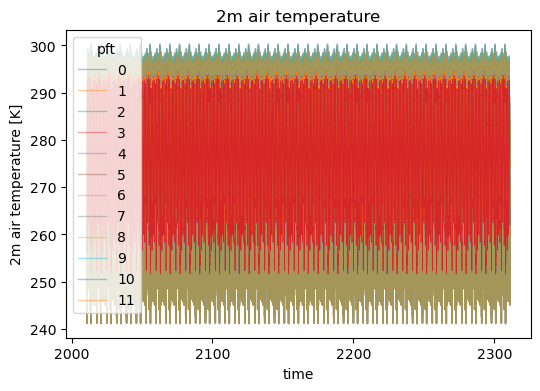

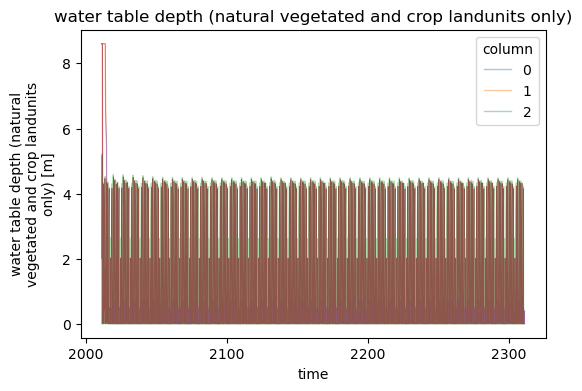

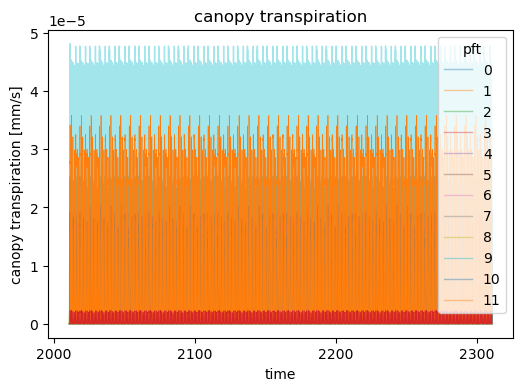

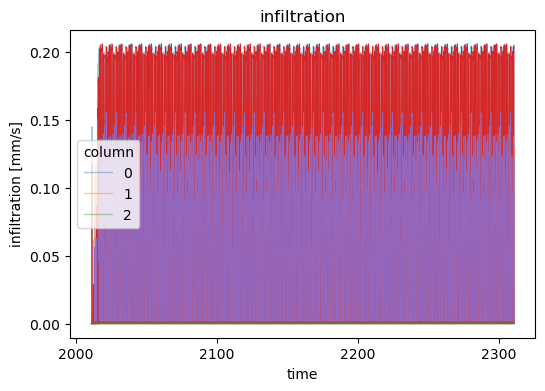

In [47]:
for var in spinup_vars:
    plot_spinup(var, data)